# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
### Initialize the environment
import time
start_time= time.time()
from datetime import timedelta
import math
import pandas as pan
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.ndimage
import tensorflow as tf
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
print('TensorFlow version:',tf.__version__)
print('STEP COMPLETE | Time used:' + str(timedelta(seconds=int(round(time.time()-start_time)))))

TensorFlow version: 0.12.head
STEP COMPLETE | Time used:0:00:14


---
## Step 0: Load The Data

In [2]:
def blend(a,b):
    n= len(a['features']) # record the original split point
    mf= np.append(a['features'], b['features'], axis=0) # combine
    ml= np.append(a['labels'], b['labels'], axis=0)     # with respect
    ms= np.append(a['sizes'], b['sizes'], axis=0)
    mc= np.append(a['coords'], b['coords'], axis=0)
    cf,cl,cs,cc= shuffle(mf,ml,ms,mc)                   # mix
    return {'features':cf[0:n], 'labels':cl[0:n], 'sizes':cs[0:n], 'coords':cc[0:n]}, \
           {'features':cf[n:], 'labels':cl[n:], 'sizes':cs[n:], 'coords':cc[n:]} # split and send back

#Unit test
#x = {'features':np.array([0,1,2,3,4,5,6]), 'labels':np.array([0.,1.,2.,3.,4.,5.,6.]), 'sizes':np.array([0,1,2,3,4,5,6]), 'coords':np.array([[0,0],[1,1],[2,2],[3,3],[4,4],[5,5],[6,6]])}
#y = {'features':np.array([7,8,9]), 'labels':np.array([7.,8.,9.]), 'sizes':np.array([7,8,9]), 'coords':np.array([[7,7],[8,8],[9,9]])}
#x,y = blend(x,y)
#print(y['features'].shape)
#print(x,y)

In [3]:
### Load the data set
start_time= time.time()
training_file= 'train.p'
testing_file= 'test.p'

with open(training_file, mode='rb') as f:
    train= pickle.load(f)
with open(testing_file, mode='rb') as f:
    test= pickle.load(f)

# if the data needs to be stirred
#train,test = blend(train,test)

X_train, y_train= train['features'], train['labels']
X_test, y_test= test['features'], test['labels']
print('STEP COMPLETE | Time used:' + str(timedelta(seconds=int(round(time.time()-start_time)))))

STEP COMPLETE | Time used:0:00:02


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

### Dataset Exploration
#### Dataset Summary

In [4]:
### Dataset Summary

# Number of training examples
n_train= len(X_train) #training features

# Number of testing examples.
n_test= len(X_test)   #testing features

# The shape of a traffic sign image
image_shape= X_train[0].shape

# Unique classes/labels there are in the dataset
n_classes= max(y_train) + 1 #training labels

print("Training examples:", n_train)
print(" Testing examples:", n_test)
print(" Image data shape:", image_shape)
print("   Pertinent size:", train['sizes'][0])
print("   Unique classes:", n_classes)
print('STEP COMPLETE')

Training examples: 39209
 Testing examples: 12630
 Image data shape: (32, 32, 3)
   Pertinent size: [29 30]
   Unique classes: 43
STEP COMPLETE


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Dataset Exploration
#### Exploratory Visualization (Part 1)

In [5]:
# First, investigate the data structure

print('Features:')
print(train['features'].shape) # features (images): number of examples, width, height, channels
print(test['features'].shape)

print('\nLabels:')
print(train['labels'].shape)   # labels:            number of examples, index
print(test['labels'].shape)

print('\nSizes:')
print(train['sizes'].shape)    # sizes:             number of examples, width, height,
print(test['sizes'].shape)

print('\nCoords:')
print(train['coords'].shape)   # coords:            number of examples, x1, y1, x2, y2,
print(test['coords'].shape)

print('\nFirst 10 class numbers from the test dataset:')
print(test['labels'][0:10]) # first 10 class indices

print('\nFirst image, first cell RGB:')
print(train['features'][0][0][0]) # first RGB value in the first cell of the first image

countByLabel= np.bincount(y_train)
print('\nNumber of images per class:', countByLabel)
print('\nMaximum:', np.max(countByLabel))
print('STEP COMPLETE')

Features:
(39209, 32, 32, 3)
(12630, 32, 32, 3)

Labels:
(39209,)
(12630,)

Sizes:
(39209, 2)
(12630, 2)

Coords:
(39209, 4)
(12630, 4)

First 10 class numbers from the test dataset:
[16  1 38 33 11 38 18 12 25 35]

First image, first cell RGB:
[75 78 80]

Number of images per class: [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]

Maximum: 2250
STEP COMPLETE


In [6]:
### Exploratory Visualization (Part 2)

# Load the associated label list
signNames= pan.read_csv("signnames.csv")

# The label list is a dictionary with 2 key/value pairs:
# ClassId is a list of index numbers that correspond to the labels in the traffic sign dataset
# SignName is a list of strings describing each class
labelList= {}
for i in range(len(signNames)):
    labelList[i]= signNames['SignName'][i]
    print(i,signNames['SignName'][i])
print('STEP COMPLETE')
del signNames

0 Speed limit (20km/h)
1 Speed limit (30km/h)
2 Speed limit (50km/h)
3 Speed limit (60km/h)
4 Speed limit (70km/h)
5 Speed limit (80km/h)
6 End of speed limit (80km/h)
7 Speed limit (100km/h)
8 Speed limit (120km/h)
9 No passing
10 No passing for vehicles over 3.5 metric tons
11 Right-of-way at the next intersection
12 Priority road
13 Yield
14 Stop
15 No vehicles
16 Vehicles over 3.5 metric tons prohibited
17 No entry
18 General caution
19 Dangerous curve to the left
20 Dangerous curve to the right
21 Double curve
22 Bumpy road
23 Slippery road
24 Road narrows on the right
25 Road work
26 Traffic signals
27 Pedestrians
28 Children crossing
29 Bicycles crossing
30 Beware of ice/snow
31 Wild animals crossing
32 End of all speed and passing limits
33 Turn right ahead
34 Turn left ahead
35 Ahead only
36 Go straight or right
37 Go straight or left
38 Keep right
39 Keep left
40 Roundabout mandatory
41 End of no passing
42 End of no passing by vehicles over 3.5 metric tons
STEP COMPLETE


In [7]:
# A general routine to display a set of images
def displayImageSet(imgSet, title):
    lineCount= math.ceil(len(imgSet)/10)
    plt.figure().set_size_inches(w= 10, h= lineCount)
    plt.suptitle(title)
    for j in range(len(imgSet)):
        plt.subplot(lineCount, 10, j+1)
        plt.axis('off')
        plt.imshow(imgSet[j],cmap='gray',interpolation='none')
    plt.show()

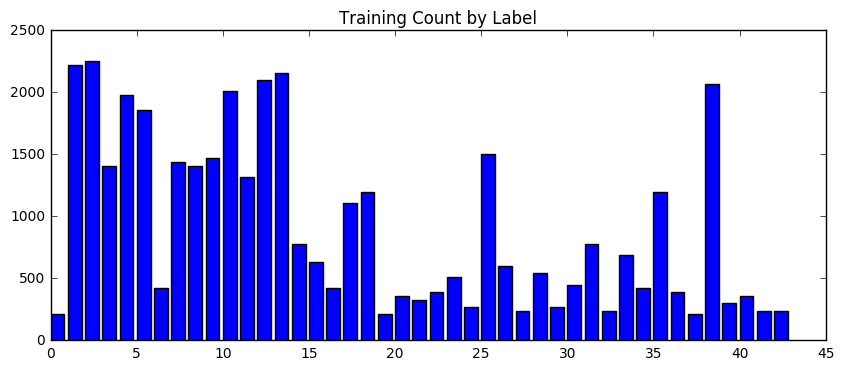

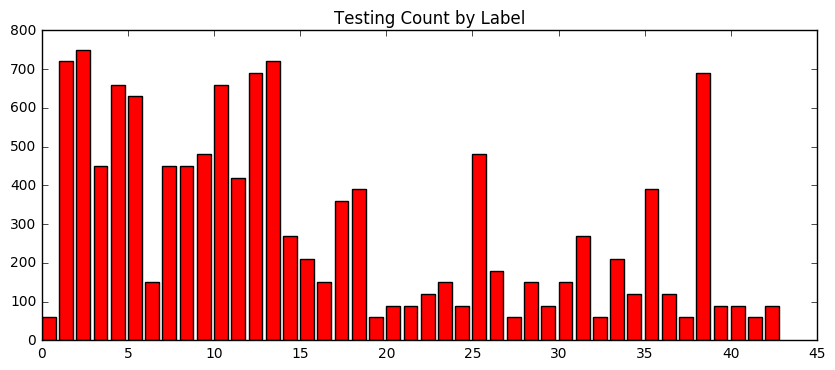

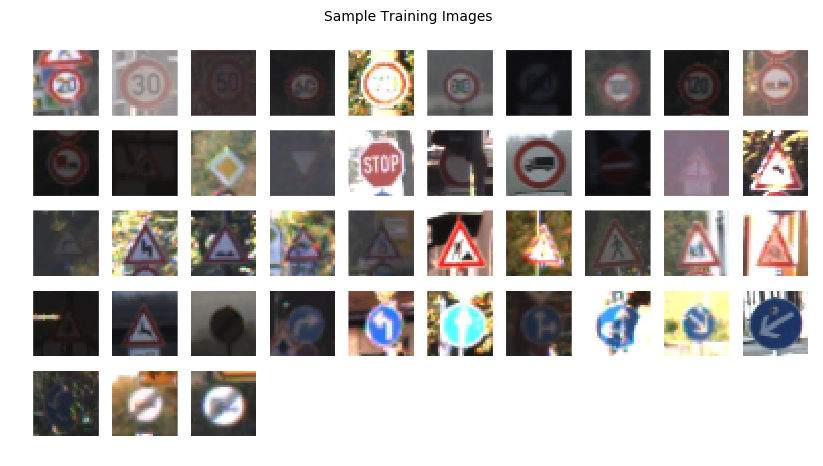

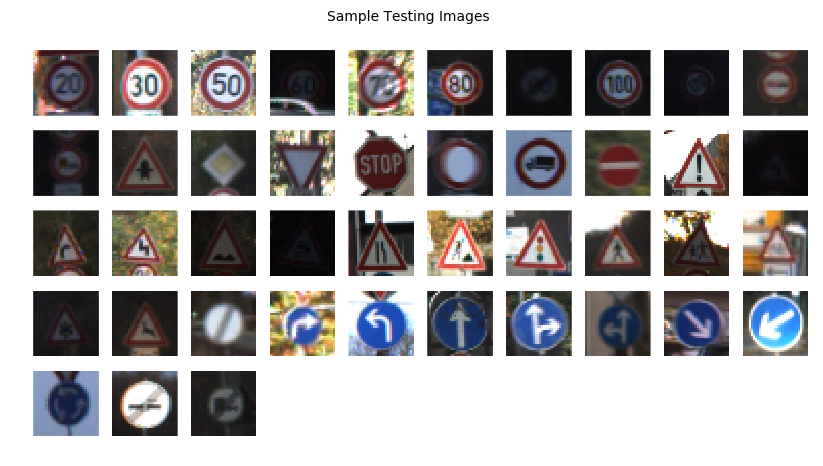

STEP COMPLETE


In [8]:
### Exploratory Visualization (Part 3)

# Simple chart of the distribution by label in the training data
plt.figure(figsize=(10, 4))
plt.bar(np.unique(y_train), np.bincount(y_train), color='blue')
plt.title('Training Count by Label')
plt.show()

# and the testing data
plt.figure(figsize=(10, 4))
plt.bar(np.unique(y_test), np.bincount(y_test), color='red')
plt.title('Testing Count by Label')
plt.show()

# Display a sample training image from each of the classes
trainFeatures= np.array(train['features'])
trainLabels= np.array(train['labels'])
classSet= []
for i in range(n_classes):            # loop through all the classes
    for j in range(len(trainLabels)): # scanning potentially all labels
        if (trainLabels[j] == i):     # until a sample image of this class is found
            classSet.append(trainFeatures[j])
            break                     # save and go on to the next class 
displayImageSet(classSet, 'Sample Training Images') #finally, display the unique classes

# Now repeat for the test images
testFeatures= np.array(test['features'])
testLabels= np.array(test['labels'])
classSet= []
for i in range(n_classes):
    for j in range(len(testLabels)):
        if (testLabels[j] == i):
            classSet.append(testFeatures[j])
            break
displayImageSet(classSet, 'Sample Testing Images')
print('STEP COMPLETE')

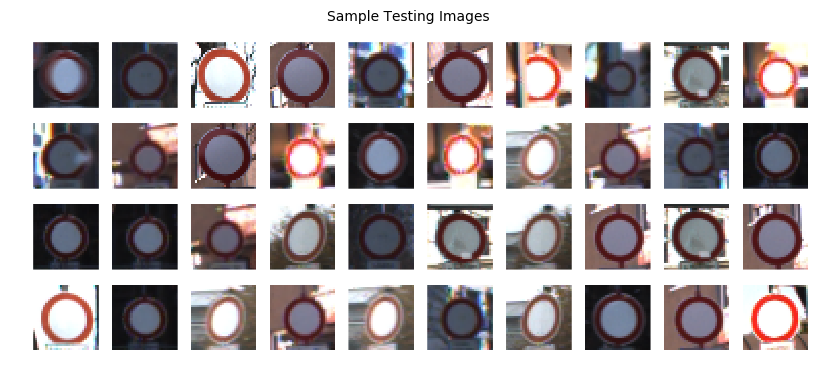

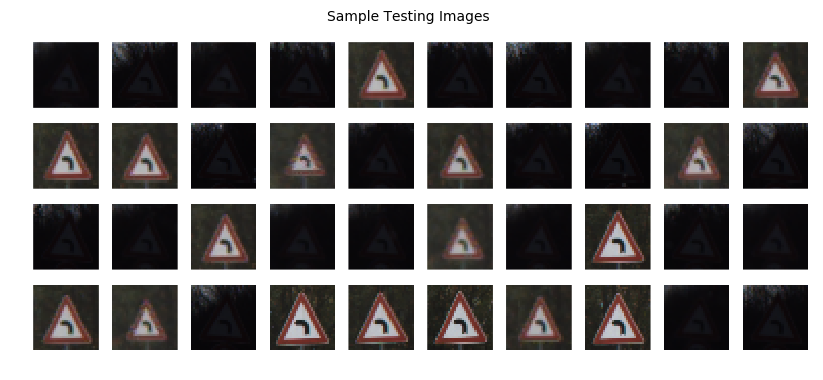

In [9]:
### Exploratory Visualization (Part 4)

# Extract one particular class of test images for examination
testFeatures= np.array(test['features'])
testLabels= np.array(test['labels'])
classSet= []
for j in range(len(testLabels)):
    if (testLabels[j] == 15):
        classSet.append(testFeatures[j])
    if (len(classSet)>=40):
        break
displayImageSet(classSet, 'Sample Testing Images')
classSet= []
for j in range(len(testLabels)):
    if (testLabels[j] == 19):
        classSet.append(testFeatures[j])
    if (len(classSet)>=40):
        break
displayImageSet(classSet, 'Sample Testing Images')
del classSet, testFeatures, testLabels

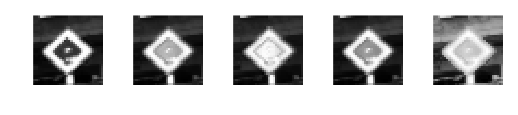

In [10]:
### Exploratory Visualization (Part 5)

# Visualize dataset color channels, grayscale, and equalized histogram
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def getChannels(image): #returns 3 images one R, one G, one B; each with shape(32,32)
    return [image[:,:,2], image[:,:,1], image[:,:,0]]

img= train['features'][20001]
subC= getChannels(img)
subC.append(grayscale(img))
subC.append(cv2.equalizeHist(grayscale(img)))
fig, axes= plt.subplots(1, 5, figsize= (5,.7))
plt.subplots_adjust(0, 0, 1, 1, 0, .1)
for i, ax in enumerate(axes.flat):
    ax.axis('off')
    ax.imshow(subC[i],cmap='gray',interpolation='none')
del img, subC, fig, axes, ax
# All represent the same traffic sign

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Design and Test a Model Architecture (Part 1)
#### Define learning parameters

In [11]:
# Initialize global learning parameters
transform= [1.,2.,3.,4., .1/3,-.1/3, .2/3,-.2/3, .1,-.1]

train_batch_size= 256  # Divide the dataset efficiently.  Useful tool: 2dtx.com/factors
valid_batch_size= 128
test_batch_size=  210
total_iterations= 0
learning_rate= 0.001
SIGMA= 0.1
MU= 0.0

# Regularization
LAMBDA= 2e-6
KEEP= 0.5  #  keep = 1.0 - dropout

STEP= 0
print('STEP COMPLETE')

STEP COMPLETE


### Design and Test a Model Architecture (Part 2)
#### Define an abstraction mechanism

In [12]:
# Create helper functions to simplify the modeling process:
gWeights= [] # an accumulator for regularization
def inputLayer(out_sx, out_sy, out_depth):
    return tf.placeholder(tf.float32, (None, out_sx, out_sy, out_depth))

def convLayer(input, sx, depth, filters):
    global MU, SIGMA, gWeights
    shape= [sx, sx, depth, filters]
    numInputs= input.get_shape()[1:3].num_elements()
    weights = tf.Variable(tf.truncated_normal(shape, mean=MU, stddev=SIGMA)) # or np.sqrt(2/numInputs)
    biases = tf.Variable(tf.zeros(filters)) #tf.constant(0.0, shape=[filters]))
    layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME') + biases
    gWeights.append(weights)
    return tf.nn.relu(layer)

def poolLayer(input, sx, stride):
    layer = tf.nn.max_pool(value=input, ksize=[1, sx, sx, 1], strides=[1, stride, stride, 1], padding='SAME')
    return layer

def flattenLayer(input):
    layer_shape = input.get_shape()
    width = layer_shape[1:4].num_elements()
    flat = tf.reshape(input, [-1, width])
    return flat, width

def fcLayer(input, numInputs, numOutputs, relu=True, dropout=1.):
    global MU, SIGMA
    shape=[numInputs, numOutputs]
    weights = tf.Variable(tf.truncated_normal(shape, mean=MU, stddev=SIGMA)) # or np.sqrt(2/numInputs)
    biases = tf.Variable(tf.zeros(numOutputs)) #tf.constant(0.0, shape=[numOutputs]))
    layer = tf.matmul(input, weights) + biases
    layer = tf.nn.dropout(layer, dropout) # Apply Dropout
    gWeights.append(weights)
    if relu:
        layer = tf.nn.relu(layer)
    return layer

def softmaxLayer(input):
    return tf.nn.softmax(input)

def regCost():
    global LAMBDA
    cost = 0.0
    for weight in gWeights:
        cost += LAMBDA * tf.nn.l2_loss(weight)
    return cost

print('STEP COMPLETE')

STEP COMPLETE


In [13]:
print(X_test[0][0][0])

[116 139 174]


In [14]:
### Check the data
print(y_test[25])
#init= tf.global_variables_initializer()
#with tf.Session() as sess:
#    sess.run(init)
#    out = sess.run(oneHotLabels[25][0:43])
#print(out)

11


### Design and Test a Model Architecture (Part 3)
#### Define models

In [15]:
# Model 1:
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=5, depth=1, filters=6)
#l2 = poolLayer(l1, sx=2, stride=2)
#l3 = convLayer(l2, sx=5, depth=6, filters=16) #depth = prev layer filters
#l4 = poolLayer(l3, sx=2, stride=2)
#   #l5 = convLayer(l4, sx=5, depth=20, filters=20)
#   #l6 = poolLayer(l5, sx=2, stride=2)
#l7,width = flattenLayer(l4)
#l8 = fcLayer(l7, numInputs=width, numOutputs=120, relu=True, dropout=keep_prob)
#l9 = fcLayer(l8, numInputs=120, numOutputs=84, relu=True, dropout=1.)
#l10 = fcLayer(l9, numInputs=84, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [16]:
# Model 2:
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=5, depth=1, filters=64)
#l2 = poolLayer(l1, sx=2, stride=2)
#l7,width = flattenLayer(l2)
#l8 = fcLayer(l7, numInputs=width, numOutputs=1024, relu=True, dropout=keep_prob)
#l9 = fcLayer(l8, numInputs=1024, numOutputs=512, relu=True, dropout=1.)
#l10 = fcLayer(l9, numInputs=512, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [17]:
# Model 3:
#keep_prob = tf.placeholder(tf.float32) # feed with keep probability where 1= keep
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=5, depth=1, filters=16)
#l2 =    poolLayer(l1, sx=2, stride=2)
#l3 = convLayer(l2, sx=3, depth=16, filters=32) #depth = prev layer filters
#l4 =    poolLayer(l3, sx=2, stride=2)
#l5 = convLayer(l4, sx=3, depth=32, filters=64)
#l6 =    poolLayer(l5, sx=2, stride=2)
#l7,width = flattenLayer(l6)
#l8 =  fcLayer(l7, numInputs=width, numOutputs=172, relu=True, dropout=keep_prob)
#l9 =  fcLayer(l8, numInputs=172, numOutputs=86, relu=True, dropout=1.)
#l10 = fcLayer(l9, numInputs=86, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [18]:
# Model 4:
#keep_prob = tf.placeholder(tf.float32) # feed with keep probability where 1= keep
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=5, depth=1, filters=16)
#l2 =    poolLayer(l1, sx=2, stride=2)
#l3 = convLayer(l2, sx=5, depth=16, filters=24) #depth = prev layer filters
#l4 =    poolLayer(l3, sx=2, stride=2)
#l5 = convLayer(l4, sx=3, depth=24, filters=32)
#l6 =    poolLayer(l5, sx=2, stride=2)
##l7a,width1 = flattenLayer(l4)
#l7,width2 = flattenLayer(l6)
##l7 = tf.concat(1, [l7a, l7b])
#l8 =  fcLayer(l7, numInputs=width2, numOutputs=512, relu=True, dropout=keep_prob)
#l9 =  fcLayer(l8, numInputs=512, numOutputs=172, relu=True, dropout=keep_prob)
#l10 = fcLayer(l9, numInputs=172, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [19]:
# Model 5:
#keep_prob = tf.placeholder(tf.float32) # feed with keep probability where 1= keep
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=5, depth=1, filters=16)
#l2 =    poolLayer(l1, sx=2, stride=2)
#l3 = convLayer(l2, sx=3, depth=16, filters=32) #depth = prev layer filters
#l4 =    poolLayer(l3, sx=2, stride=2)
#l5 = convLayer(l4, sx=3, depth=32, filters=64)
#l6 =    poolLayer(l5, sx=2, stride=2)
#l7,width = flattenLayer(l6)
#l8 =  fcLayer(l7, numInputs=width, numOutputs=512, relu=True, dropout=keep_prob)
#l9 =  fcLayer(l8, numInputs=512, numOutputs=256, relu=True, dropout=keep_prob)
#l10 = fcLayer(l9, numInputs=256, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [20]:
# Model 6:
#keep_prob = tf.placeholder(tf.float32) # feed with keep probability where 1= keep
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=5, depth=1, filters=16)
#l2 =    poolLayer(l1, sx=2, stride=2)
#l3 = convLayer(l2, sx=3, depth=16, filters=24) #depth = prev layer filters
#l4 =    poolLayer(l3, sx=2, stride=2)
#l5 = convLayer(l4, sx=3, depth=24, filters=32)
#l6 =    poolLayer(l5, sx=2, stride=2)
#l7a,width1 = flattenLayer(l4)
#l7b,width2 = flattenLayer(l6)
#l7 = tf.concat(1, [l7a, l7b])
#l8 =  fcLayer(l7, numInputs=width1+width2, numOutputs=512, relu=True, dropout=keep_prob)
#l9 =  fcLayer(l8, numInputs=512, numOutputs=256, relu=True, dropout=keep_prob)
#l10 = fcLayer(l9, numInputs=256, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [21]:
# Model 7:
#keep_prob = tf.placeholder(tf.float32) # feed with keep probability where 1= keep
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=3, depth=1, filters=32)
#l2 =    poolLayer(l1, sx=2, stride=2)
#l3 = convLayer(l2, sx=4, depth=32, filters=64) #depth = prev layer filters
#l4 =    poolLayer(l3, sx=2, stride=2)
#l5 = convLayer(l4, sx=3, depth=64, filters=128)
#l6 =    poolLayer(l5, sx=2, stride=2)
#l7,width = flattenLayer(l6)
#l8 =  fcLayer(l7, numInputs=width, numOutputs=512, relu=True, dropout=keep_prob)
#l10 = fcLayer(l8, numInputs=512, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [22]:
# Model 8:
#keep_prob = tf.placeholder(tf.float32) # feed with keep probability where 1= keep
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=5, depth=1, filters=16)
#l2 =   tf.nn.dropout(poolLayer(l1, sx=2, stride=2), keep_prob) # Apply Dropout
#l3 = convLayer(l2, sx=5, depth=16, filters=24) #depth = prev layer filters
#l4 =    tf.nn.dropout(poolLayer(l3, sx=2, stride=2), keep_prob)
#l5 = convLayer(l4, sx=5, depth=24, filters=32)
#l6 =    tf.nn.dropout(poolLayer(l5, sx=2, stride=2), keep_prob)
#
#l1a = convLayer(x, sx=3, depth=1, filters=16) # Parallel cnn w/ smaller filters
#l2a =    tf.nn.dropout(poolLayer(l1a, sx=2, stride=2), keep_prob)
#l3a = convLayer(l2a, sx=3, depth=16, filters=24)
#l4a =    tf.nn.dropout(poolLayer(l3a, sx=2, stride=2), keep_prob)
#l5a = convLayer(l4a, sx=3, depth=24, filters=32)
#l6a =    tf.nn.dropout(poolLayer(l5a, sx=2, stride=2), keep_prob)
#
#l7a,width1 = flattenLayer(l4)
#l7b,width2 = flattenLayer(l6)
#l7c,width3 = flattenLayer(l4a)
#l7d,width4 = flattenLayer(l6a)
#
#l7 = tf.concat(1, [l7a, l7b, l7c, l7d])
#l8 =  fcLayer(l7, numInputs=width1+width2+width3+width4, numOutputs=1024, relu=True, dropout=keep_prob)
#l9 =  fcLayer(l8, numInputs=1024, numOutputs=512, relu=True, dropout=keep_prob)
#l10 = fcLayer(l9, numInputs=512, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [23]:
# Model 9:
#keep_prob = tf.placeholder(tf.float32) # feed with keep probability where 1= keep
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=5, depth=1, filters=16)
#l2 =    tf.nn.dropout(poolLayer(l1, sx=2, stride=2), keep_prob)
#l3 = convLayer(l2, sx=3, depth=16, filters=24) #depth = prev layer filters
#l4 =    tf.nn.dropout(poolLayer(l3, sx=2, stride=2), keep_prob)
#l5 = convLayer(l4, sx=3, depth=24, filters=32)
#l6 =    tf.nn.dropout(poolLayer(l5, sx=2, stride=2), keep_prob)
#l7a,width1 = flattenLayer(l4)
#l7b,width2 = flattenLayer(l6)
#l7 = tf.concat(1, [l7a, l7b])
#l8 =  fcLayer(l7, numInputs=width1+width2, numOutputs=512, relu=True, dropout=keep_prob)
#l9 =  fcLayer(l8, numInputs=512, numOutputs=256, relu=True, dropout=keep_prob)
#l10 = fcLayer(l9, numInputs=256, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [24]:
# Model 11: variant of model 9
#keep_prob = tf.placeholder(tf.float32) # feed with keep probability where 1= keep
#x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
#l1 = convLayer(x, sx=5, depth=1, filters=8)
#l2 =    tf.nn.dropout(poolLayer(l1, sx=2, stride=2), keep_prob)
#l3 = convLayer(l2, sx=3, depth=8, filters=8) #depth = prev layer filters
#l4 =    tf.nn.dropout(poolLayer(l3, sx=2, stride=2), keep_prob)
#l5 = convLayer(l4, sx=3, depth=8, filters=32)
#l6 =    tf.nn.dropout(poolLayer(l5, sx=2, stride=2), keep_prob)
#l7a,width1 = flattenLayer(l4)
#l7b,width2 = flattenLayer(l6)
#l7 = tf.concat(1, [l7a, l7b])
##l9 =  fcLayer(l7, numInputs=width1+width2, numOutputs=86, relu=True, dropout=keep_prob)
#l10 = fcLayer(l7, numInputs=width1+width2, numOutputs=43, relu=False, dropout=1.)
#y_pred = softmaxLayer(l10)

In [25]:
### Define the batch fetching operation
def getBatch(batchSize): 
    global STEP
    n= STEP*batchSize
    if n >= len(X_train): #loop back to the start
        STEP= 0
        n= 0
        #shuffle here?
    batch_x= np.array(X_train[n:n+batchSize,:,:,0:5]).astype(np.float32)
    batch_y= y_train[n:n+batchSize].astype(np.int32)
    STEP += 1
    return batch_x, batch_y 
print('STEP COMPLETE')

STEP COMPLETE


### Design and Test a Model Architecture (Part 4)
#### Preprocessing

In [26]:
# Step 1: Convert images to grayscale

start_time = time.time()
X_train= train['features']  # Reset
X_test= test['features']

print(X_train.shape)
X_train_gray= np.zeros([X_train.shape[0], X_train.shape[1], X_train.shape[2]],dtype=np.uint8)
X_test_gray= np.zeros([X_test.shape[0], X_test.shape[1], X_test.shape[2]],dtype=np.uint8)

for index in range(n_train):
    image= X_train[index]
    imageGray= grayscale(image)
    X_train_gray[index]= imageGray

for index in range(n_test):
    image= X_test[index]
    imageGray= grayscale(image)
    X_test_gray[index]= imageGray
print('RGB to gray completed')
print(X_test_gray.shape)

X_train= X_train_gray
X_test= X_test_gray
print(X_train.shape)

del X_train_gray, X_test_gray, image

print('STEP COMPLETE | Time used:' + str(timedelta(seconds=int(round(time.time()-start_time)))))

(39209, 32, 32, 3)
RGB to gray completed
(12630, 32, 32)
(39209, 32, 32)
STEP COMPLETE | Time used:0:00:01


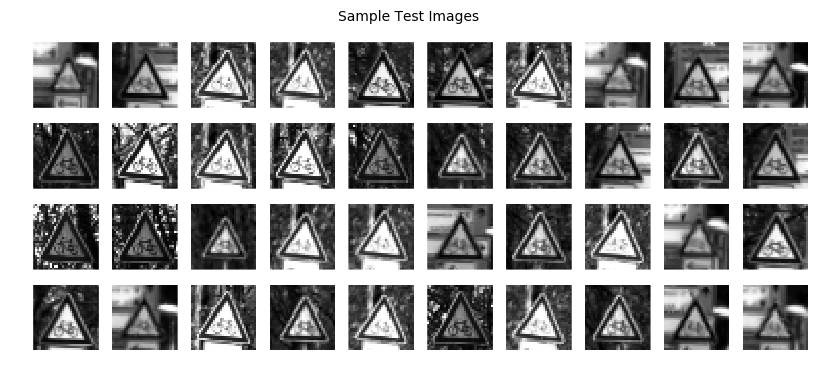

In [27]:
# Step 2: Visualize a sample from the test data
classSet= []
for j in range(len(y_test)):
    if (y_test[j] == 29):  # <--- CLASS
        classSet.append(X_test[j])
    if (len(classSet)>=40):
        break
displayImageSet(classSet, 'Sample Test Images')
del classSet

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** <br>
The data is preprocessed by first converting the color values to grayscale and second to normalized values between values of 0.1 and 0.9. I opted for grayscale processing for several reasons: 1) feedback from failed attempts at building the model, 2) performance in the data augmentation routine, 3) my test machine, built in 2010, is not GPU-capable therefore saving some processing cycles helps, and 4) I was determined to achieve over 94% accuracy with grayscale images. I later moved the normalization further down the pipeline to step 5 in the next section below (post augmentation).

Initially, I augmented and then grayscale/normalize, however, the model reported high training costs. By first converting the dataset to grayscale, and then augmenting and normalizing, the training costs dropped significantly, achieving almost 100% training accuracy. Additionally, I read papers such as that referenced above and also https://arxiv.org/pdf/1511.02992.pdf

It is worth noting that during one round of test, recognition accuracy increased 2% by appending the training dataset with equalized histogram images. The thought here is that the images are the same, but slightly different, hence more regularity. This method however, resulted in memory faults and thrashing due to an unmanageable dataset size.

### Design and Test a Model Architecture (Part 5)
#### Generate additional data and split

In [28]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.

In [29]:
# Step 1: Add to deficient training classes
for j in range(len(countByLabel)):
    q= int(np.max(countByLabel)/countByLabel[j])  # largest group divided by this group
    r= min(q-1, len(transform)-1)                 # determine transform blocks
    if r < 1:                                     # sufficiency test
        continue
    print('Processing class',j,':',labelList[j], end='')
    newFeatures, newLabels= [], []
    w= np.where(y_train==j)
    post= False
    for i in range(r):
        print('.', end='')
        for v in w[0]:
            if i<3: # case 0,1,2
                img= train['features'][v]        # Fetch the color data
                subC= np.array(getChannels(img)) # Split into rgb
                k= subC[i]                       # Assign channel data
                post= True
            elif i<4: # case 3
                #debug print(X_train[v])
                k= cv2.equalizeHist(X_train[v])# EqHist
                post= True
            elif i<10: # case 4-9
                k= scipy.ndimage.rotate(X_train[v], transform[i]*180./math.pi, reshape=False, mode='nearest') # small rotations
                post= True
            if post:
                newLabels.append(j)
                newFeatures.append(k)
    if post:
        X_train= np.append(X_train, newFeatures, axis=0)
        y_train= np.append(y_train, newLabels, axis=0)
    print()
# Clean up memory
del newFeatures, newLabels, w
if 'img' in globals():
    del img
if 'subC' in globals():
    del subC
if 'k' in globals():
    del k
print('Total number of training samples:',len(X_train))
print('STEP COMPLETE')

Processing class 0 : Speed limit (20km/h).........
Processing class 6 : End of speed limit (80km/h)....
Processing class 14 : Stop.
Processing class 15 : No vehicles..
Processing class 16 : Vehicles over 3.5 metric tons prohibited....
Processing class 17 : No entry.
Processing class 19 : Dangerous curve to the left.........
Processing class 20 : Dangerous curve to the right.....
Processing class 21 : Double curve.....
Processing class 22 : Bumpy road....
Processing class 23 : Slippery road...
Processing class 24 : Road narrows on the right.......
Processing class 26 : Traffic signals..
Processing class 27 : Pedestrians........
Processing class 28 : Children crossing...
Processing class 29 : Bicycles crossing.......
Processing class 30 : Beware of ice/snow....
Processing class 31 : Wild animals crossing.
Processing class 32 : End of all speed and passing limits........
Processing class 33 : Turn right ahead..
Processing class 34 : Turn left ahead....
Processing class 36 : Go straight or

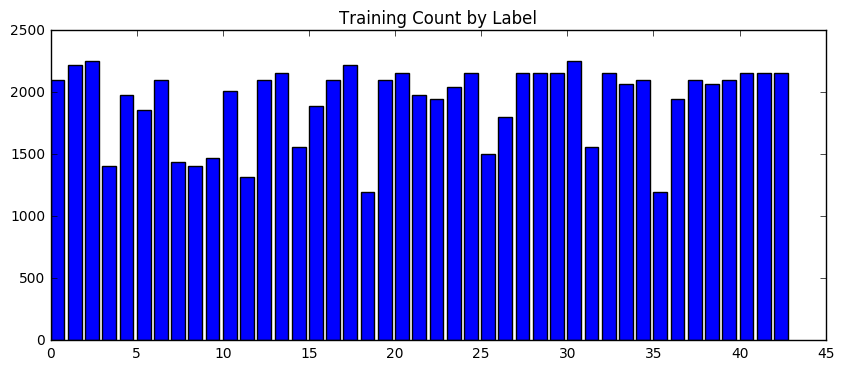

In [30]:
# Step 2: Simple chart of the distribution by label in the training data
plt.figure(figsize=(10, 4))
plt.bar(np.unique(y_train), np.bincount(y_train), color='blue')
plt.title('Training Count by Label')
plt.show()

In [31]:
# Step 3: Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)
print('STEP COMPLETE')

STEP COMPLETE


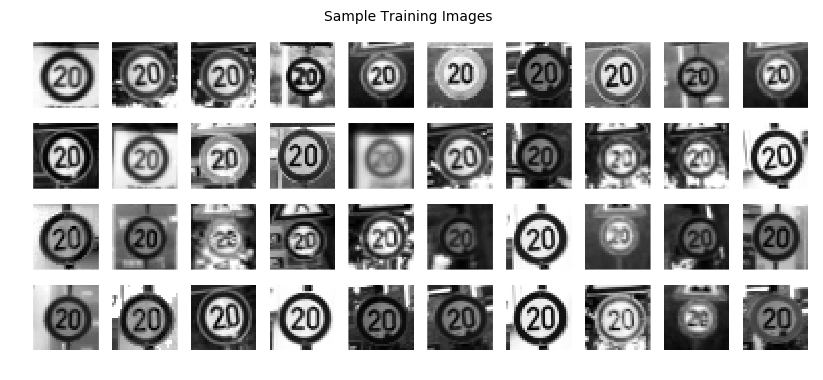

In [32]:
# Step 4: Pull a sample from an augmented and shuffled training class
classSet= []
for j in range(len(y_train)):
    if (y_train[j] == 0):  # <--- CLASS
        classSet.append(X_train[j])
    if (len(classSet)>=40):
        break
displayImageSet(classSet, 'Sample Training Images')
del classSet

In [33]:
# Step 5: Normalize image data to values in range .1 to .9
def normalize(image):
    a= 0.9 # highest value
    b= 0.1 # lowest value   
    return b + image*(a-b)/255

# Batch mode
oLen= X_train.shape[0]
print(oLen)
BATCH_SIZE= 256
batches= int(oLen / BATCH_SIZE ) + 1
print('batches:',batches)
print(oLen, X_train.shape[1], X_train.shape[2])

# Temp storage for training data, amended with remainder to whole batch size
X_train_t= np.append(X_train, np.zeros([batches*BATCH_SIZE-oLen, X_train.shape[1], X_train.shape[2]],dtype=np.float32),axis=0)
print(X_train_t.shape)

# Temp storage for normalized data (whole batch size)
X_train_n= np.zeros([batches*BATCH_SIZE, X_train.shape[1], X_train.shape[2]],dtype=np.float32)
print(X_train_n.shape)

# Process all batches, pulling data from the _t temp store
for b in range(batches):
    X_train_n[b*BATCH_SIZE:b*BATCH_SIZE+BATCH_SIZE,:]= normalize(X_train_t[b*BATCH_SIZE:b*BATCH_SIZE+BATCH_SIZE,:])

print('_n:',X_train_n.shape)
X_train= X_train_n[0:oLen] # copy _t temp
X_test= normalize(X_test)

del X_train_n, X_train_t
print('Data normalization completed')
print('Train structure is',X_train.shape)
print('Test structure is',X_test.shape)
print('STEP COMPLETE')

83007
batches: 325
83007 32 32
(83200, 32, 32)
(83200, 32, 32)
_n: (83200, 32, 32)
Data normalization completed
Train structure is (83007, 32, 32)
Test structure is (12630, 32, 32)
STEP COMPLETE


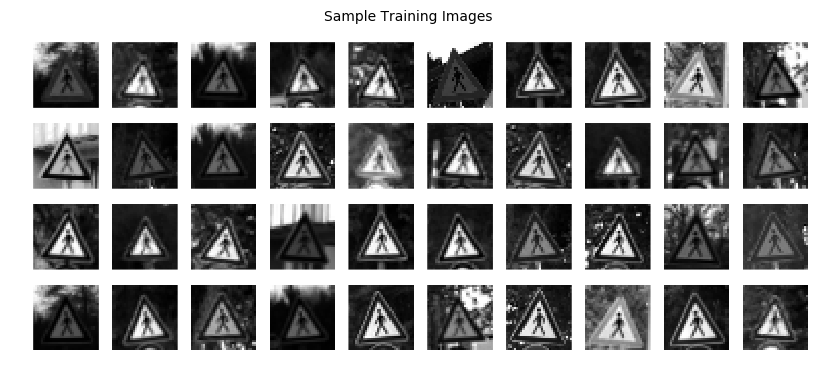

In [34]:
# Step 6: Check a sample from the normalized data
classSet= []
for j in range(len(y_train)):
    if (y_train[j] == 27):  # <--- CLASS
        classSet.append(X_train[j])
    if (len(classSet)>=40):
        break
displayImageSet(classSet, 'Sample Training Images')
del classSet

In [35]:
# Step 7: Split the dataset into testing and validation

# Split training dataset into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.1, random_state=21)
print(' New train:', X_train.shape)
print(' New valid:', X_valid.shape)
print(' Orig test:', X_test.shape)
print('Orig label:', y_train.shape)

print('STEP COMPLETE')

 New train: (74706, 32, 32)
 New valid: (8301, 32, 32)
 Orig test: (12630, 32, 32)
Orig label: (74706,)
STEP COMPLETE


In [36]:
# Step 8: Reshape for TensorFlow
X_train= np.reshape(X_train, (-1, 32, 32, 1))
X_valid= np.reshape(X_valid, (-1, 32, 32, 1))
X_test= np.reshape(X_test, (-1, 32, 32, 1))
print('Reshape completed')

Reshape completed


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**<br>
The ratio of training to test examples is 3:1 with approximately 1/4 of the total examples labeled as "testing". After additional reading about recommended partitioning for train/validate/test, I initially decided to break the "testing" portion of the data into two parts: a set for validation and a set for final test to confirm the actual predictive power of the solution.

Thus, I planned to use 2/3 of the testing data for validation and 1/3 for final test. A number of training/test cycles were performed with this configuration. 

Upon finding a suitable model that performs reasonably well, I revised the split process to divide the training dataset (a tenth to validation) and maintain the test dataset unchanged for an unbiased reading on accuracy. 

Some of the classes of images have far fewer images for training. To generate new data for these classes, because I am working in grayscale, first I copy each of the color layers as new sample images. If more is required for a class, I also use an equalized histogram version of the image. Finally, for the most underrepresented classes, I also apply slight rotations (no more than a .1 rad) to additional copies of the class. Through this augmentation process, all classes have more than a 1000 images. These small variances add some regularization and appear to be similar to the original dataset. Sample random images from the augmented Pedestrians class are shown above.

### Design and Test a Model Architecture (Part 6)
#### Model Architecture

In [37]:
# Model 9: variant of model 6
keep_prob = tf.placeholder(tf.float32) # feed with keep probability where 1= keep
x = inputLayer(out_sx=32, out_sy=32, out_depth=1)
l1 = convLayer(x, sx=5, depth=1, filters=16)
l2 =    tf.nn.dropout(poolLayer(l1, sx=2, stride=2), keep_prob)
l3 = convLayer(l2, sx=3, depth=16, filters=24) #depth = prev layer filters
l4 =    tf.nn.dropout(poolLayer(l3, sx=2, stride=2), keep_prob)
l5 = convLayer(l4, sx=3, depth=24, filters=32)
l6 =    tf.nn.dropout(poolLayer(l5, sx=2, stride=2), keep_prob)
l7a,width1 = flattenLayer(l4)
l7b,width2 = flattenLayer(l6)
l7 = tf.concat(1, [l7a, l7b])
l8 =  fcLayer(l7, numInputs=width1+width2, numOutputs=512, relu=True, dropout=keep_prob)
l9 =  fcLayer(l8, numInputs=512, numOutputs=256, relu=True, dropout=keep_prob)
l10 = fcLayer(l9, numInputs=256, numOutputs=43, relu=False, dropout=1.)
y_pred = softmaxLayer(l10)
print('x:',x)
print('l1:',l1)
print('l2:',l2)
print('l3:',l3)
print('l4:',l4)
print('l5:',l5)
print('l6:',l6)
print('l7:',l7)
print('l8:',l8)
print('l9:',l9)
print('l10:',l10)
print('y_pred:',y_pred)
print('STEP COMPLETE')

x: Tensor("Placeholder_1:0", shape=(?, 32, 32, 1), dtype=float32)
l1: Tensor("Relu:0", shape=(?, 32, 32, 16), dtype=float32)
l2: Tensor("dropout/mul:0", shape=(?, 16, 16, 16), dtype=float32)
l3: Tensor("Relu_1:0", shape=(?, 16, 16, 24), dtype=float32)
l4: Tensor("dropout_1/mul:0", shape=(?, 8, 8, 24), dtype=float32)
l5: Tensor("Relu_2:0", shape=(?, 8, 8, 32), dtype=float32)
l6: Tensor("dropout_2/mul:0", shape=(?, 4, 4, 32), dtype=float32)
l7: Tensor("concat:0", shape=(?, 2048), dtype=float32)
l8: Tensor("Relu_3:0", shape=(?, 512), dtype=float32)
l9: Tensor("Relu_4:0", shape=(?, 256), dtype=float32)
l10: Tensor("add_5:0", shape=(?, 43), dtype=float32)
y_pred: Tensor("Softmax:0", shape=(?, 43), dtype=float32)
STEP COMPLETE


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**<br>
Driven by a target of reaching at least 95% accuracy on the test data and new images, I experimented with multiple models with a variety of results (listed in the answer to question 4 below). The final architecture consists of 3 convolutional (conv) layers feeding into 3 fully-connected (fc) layers. <br>

The first convolutional layer applies 16 5x5 filters to the 32x32x1 images. The second conv layer applies 24 3x3 filters to the inbound 16x16x16 tensor. The third conv layer applies 32 3x3 filters to the inbound 8x8x24 tensor. Resulting tensors (8x8x24 and 4x4x32) from the previous two convolutional layers are flattened to 2048x1 for input to the fully-connected layers. All convolutional layers are dropout capable. <br>

The first fc layer can perform dropout and produces a 512x1 tensor. The second fc layer can also drop out and reduces to a 256x1 tensor. The final layer outputs a 43x1 classification tensor. With parameter sharing in the convolutional layer, the parameter count for the complete model totals 1,192,443. This may be excessive for the image size, and additional research cycles would be necessary to identify the minimum parameter quantity to achieve a maximum accuracy value.

### Design and Test a Model Architecture (Part 7)
#### Training

In [38]:
### Define operators
y_true = tf.placeholder(tf.int32, shape=(None))
#debug: y_true = tf.placeholder(tf.float32, shape=(None))
#debug: y_pred_cls = tf.argmax(l10, dimension=1)
y_pred_cls = tf.argmax(y_pred, dimension=1)
y_one_hot = tf.one_hot(y_true, 43)
y_true_cls = tf.argmax(y_one_hot, dimension=1)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=l10, labels=y_true)
#debug: cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=l10, labels=y_one_hot)
cost = tf.reduce_mean(cross_entropy) + regCost()
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate) #or ___Optimizer
trainer = optimizer.minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls) #debug: tf.Print(y_true_cls,[y_true_cls,y_pred_cls])
#debug: correct_prediction = tf.equal(y_pred, y_true)
evaluate = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('STEP COMPLETE')

STEP COMPLETE


In [39]:
### Define optimizer
def optimize(num_iterations):
    global total_iterations
    num_examples= num_iterations * train_batch_size
    totalLoss, totalAcc= 0, 0
    for i in range(total_iterations, total_iterations+num_iterations):
        x_batch, y_true_batch= getBatch(train_batch_size)
        feed_dict_train= {y_true: y_true_batch, x: x_batch, keep_prob:KEEP}
        _,loss = session.run([trainer,cost], feed_dict= feed_dict_train)
        acc= session.run(evaluate, feed_dict={y_true: y_true_batch, x: x_batch, keep_prob:1.0})
        totalLoss += (loss * x_batch.shape[0])
        totalAcc += (acc * x_batch.shape[0])
        if i % 50 == 0:
            print()
            msg= "Training batch: {0:>6}, accuracy: {1:>6.1%}"
            print(msg.format(i + 1, acc), end='')
        if i % 2 == 0:
            print('.', end='')
    total_iterations += num_iterations
    return totalLoss/num_examples, totalAcc/num_examples
print('STEP COMPLETE')

STEP COMPLETE


In [40]:
### Define validator
def validator():
    steps_per_epoch= len(y_valid)//valid_batch_size
    num_examples= steps_per_epoch * valid_batch_size
    totalAcc, totalLoss = 0, 0
    for step in range(steps_per_epoch):
        n_start= step*valid_batch_size        
        batch_x=  X_valid[n_start:n_start+valid_batch_size,:,:,0:1]
        batch_y=  y_valid[n_start:n_start+valid_batch_size]
        loss, acc= session.run([cost, evaluate], feed_dict={x: batch_x, y_true: batch_y, keep_prob:1.0})
        totalAcc += (acc * batch_x.shape[0])
        totalLoss += (loss * batch_x.shape[0])
    return totalLoss/num_examples, totalAcc/num_examples
print('STEP COMPLETE')

STEP COMPLETE


In [41]:
### Define tester
def tester():
    steps_per_epoch= len(y_test)//test_batch_size
    num_examples= steps_per_epoch * test_batch_size
    totalAcc, totalLoss = 0, 0
    for step in range(steps_per_epoch):
        n_start= step*test_batch_size        
        batch_x=  X_test[n_start:n_start+test_batch_size,:,:,0:1]
        batch_y=  y_test[n_start:n_start+test_batch_size]
        loss, acc = session.run([cost, evaluate], feed_dict={x: batch_x, y_true: batch_y, keep_prob:1.0})
        totalAcc += (acc * batch_x.shape[0])
        totalLoss += (loss * batch_x.shape[0])
    return totalLoss/num_examples, totalAcc/num_examples
print('STEP COMPLETE')

STEP COMPLETE


In [42]:
### Initialize and run first epoch
start_time= time.time()
STEP= 0
TotalEpochs= 1
total_iterations=0
learning_rate= .01 #1.0
KEEP= .95 #1.
epochIter = len(X_train)//train_batch_size
print('Number of iterations required for one epoch:',epochIter)
trainingCost, trainingAcc, validationCost, validationAcc= [], [], [], []
session= tf.Session()                           # <---------ESTABLISH NEW SESSION
session.run(tf.global_variables_initializer())  # <--------------------INITIALIZE
saver= tf.train.Saver()                         # <------------------PREP TO SAVE
print("Processing initial epoch", end='')
trainCost, trainAcc= optimize(num_iterations=epochIter)
validLoss, validAcc= validator()
trainingCost.append(trainCost)
validationCost.append(validLoss)
trainingAcc.append(trainAcc)
validationAcc.append(validAcc)
print("\n  Training loss: {0:.3f}, accuracy: {1:.3f}".format(trainCost,trainAcc))
print("Validation loss: {0:.3f}, accuracy: {1:.3f}".format(validLoss,validAcc))
print("Time used: " + str(timedelta(seconds=int(round(time.time()-start_time)))))
print('STEP COMPLETE')

Number of iterations required for one epoch: 291
Processing initial epoch
Training batch:      1, accuracy:   4.7%.........................
Training batch:     51, accuracy:  30.9%.........................
Training batch:    101, accuracy:  67.2%.........................
Training batch:    151, accuracy:  82.4%.........................
Training batch:    201, accuracy:  85.2%.........................
Training batch:    251, accuracy:  94.5%.....................
  Training loss: 1.460, accuracy: 0.679
Validation loss: 0.292, accuracy: 0.927
Time used: 0:02:31
STEP COMPLETE


In [43]:
### Define easing function for hyperparameter automation
def easeInCirc(p,s,e): #p 0.0 --> 1.0
    r=e-s # range= start-end
    return ((1. - math.sin(math.acos(p)))*r)+s

In [44]:
### Run additional training epochs
EPOCHS= 19   # <--- number of additional epochs to run
start_time= time.time()
for i in range(EPOCHS):
    print("Processing epoch:",TotalEpochs+1, end='')
    
    # Automated hyperparameters:
    p= i/(EPOCHS-1.)                          # percentage of the way
    KEEP= easeInCirc(p,.5,.95)                # range: 0.5 --> .95
    learning_rate= easeInCirc(1.-p,.001,.01)  # inverted range: .01 --> .001
    print(' (Keep:',KEEP,'Lr:',learning_rate,')')
    
    X_train, y_train= shuffle(X_train, y_train)
    trainCost, trainAcc= optimize(num_iterations=epochIter) # Deep learning!
    validLoss, validAcc= validator()
    trainingCost.append(trainCost) # gather cost/loss and accuracy for graphing
    validationCost.append(validLoss)
    trainingAcc.append(trainAcc)
    validationAcc.append(validAcc)
    print("\n  Training loss: {0:.3f}, accuracy: {1:.3f}".format(trainCost,trainAcc))
    print("Validation loss: {0:.3f}, accuracy: {1:.3f}".format(validLoss,validAcc))
    TotalEpochs+= 1
print("Time used: " + str(timedelta(seconds=int(round(time.time()-start_time)))))
print('STEP COMPLETE')

Processing epoch: 2 (Keep: 0.5 Lr: 0.010000000000000002 )
....
Training batch:    301, accuracy:  28.5%.........................
Training batch:    351, accuracy:  80.5%.........................
Training batch:    401, accuracy:  80.5%.........................
Training batch:    451, accuracy:  81.2%.........................
Training batch:    501, accuracy:  85.2%.........................
Training batch:    551, accuracy:  85.2%................
  Training loss: 2.029, accuracy: 0.782
Validation loss: 0.745, accuracy: 0.859
Processing epoch: 3 (Keep: 0.5006949811097142 Lr: 0.007041960108450191 )
.........
Training batch:    601, accuracy:  90.2%.........................
Training batch:    651, accuracy:  89.5%.........................
Training batch:    701, accuracy:  89.8%.........................
Training batch:    751, accuracy:  91.0%.........................
Training batch:    801, accuracy:  90.6%.........................
Training batch:    851, accuracy:  93.4%............
  Tr

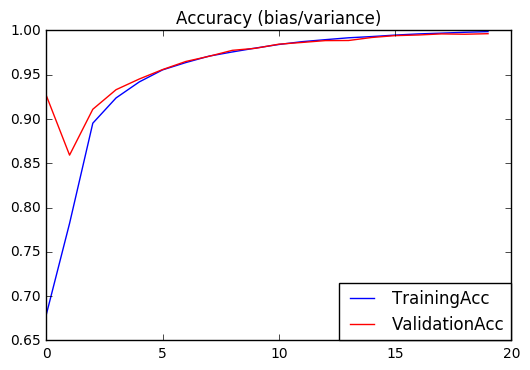

In [45]:
### Report on Accuracy
plt.plot(trainingAcc, color='#0000ff', label= 'TrainingAcc')
plt.plot(validationAcc, color='#ff0000', label= 'ValidationAcc')
plt.title('Accuracy (bias/variance)')
plt.legend(loc= 'lower right', borderaxespad= 0.)
plt.show()

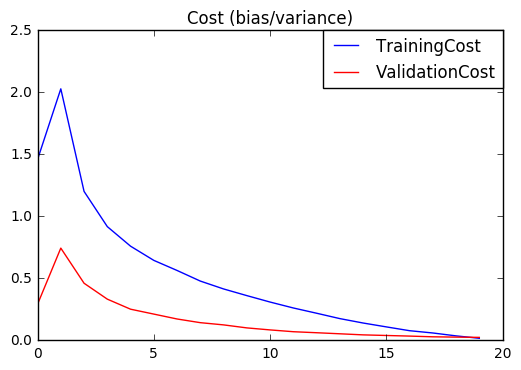

In [46]:
### Report on Cost/loss
plt.plot(trainingCost, color='#0000ff', label= 'TrainingCost')
plt.plot(validationCost, color='#ff0000', label= 'ValidationCost')
plt.title('Cost (bias/variance)')
plt.legend(loc= 'upper right', borderaxespad= 0.)
plt.show()

In [47]:
### Save the trained model
print(total_iterations)
saver.save(session, './traffic5')   # saver is initialized on first epoch
print("Model saved")

5820
Model saved


In [48]:
### Restore the trained model
RESTORE= False
if RESTORE:
    ckpt = tf.train.get_checkpoint_state('./')
    if ckpt and ckpt.model_checkpoint_path:
        saver.restore(session, ckpt.model_checkpoint_path)
        print("Model restored")
    else:
        print("Model not found")

### Test accuracy results

In [49]:
### Evaluate with the test data
#test_batch_size= 421
testLoss, testAcc = tester()
print("Test loss: {:.3f}".format(testLoss))
print("Test accuracy: {:.3f}".format(testAcc))
print('STEP COMPLETE')

Test loss: 0.242
Test accuracy: 0.948
STEP COMPLETE


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**<br>
The AdamOptimizer is used in the training pipeline, based on its use in LeNet solution and further reading (https://arxiv.org/pdf/1412.6980v7.pdf). The training batch size is 256. Hyperparameters are mu=0, sigma=0.1, learningRate=0.001. I apply l2 regularization to penalize any large weights. For most tests, lambda is 1e-6, however for the final run, 2e-6. For consistency and flexibility, I automated two of the hyperparameters during 19 of the epoch training cycles. For instance, the keep rate (1 - dropout) starts at 0.5, and slowly increases to 1.0 following a circular easing formula. Likewise, the learning rate moves swiftly from 0.1 into the .01 range and then moves slowly toward 0.005. An example of these rates spanning 10 epochs is listed below:

<pre>
     Epoch  LearnRate  KeepRate
     1      0.10000    0.50000
     2      0.05648    0.50310
     3      0.04029    0.51250
     4      0.02919    0.52860
     5      0.02101    0.55210
     6      0.01490    0.58426
     7      0.01043    0.62732
     8      0.00738    0.68573
     9      0.00559    0.77094
     10     0.00500    1.00000
</pre>

The cost(loss) and accuracy are captured during training sessions and graphed over epochs to determine an appropriate stopping point. As the number of epochs increases beyond approximately 20, the variance increases between the training and validation losses. Another notable metric is the drop in test accuracy after reaching a peak value.

Training is performed in CPU-mode on a Xeon W3520 (equivalent to i7 920 generation 1) at 2.8GHz with 6GB memory. TThrottle regulates the Python process when cores exceed 90°C; memory averages 1.7GB utilization by the process. The selected final architecture takes approximately 4+ minutes per epoch.

<b>Record of training meta parameters and test cycle results</b><br>
T00-T05 Unsuccessful runs<br>

T06 Model 1 no convergence
<pre>{Model:1, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Sigma:0.1, Epoch:1, Acc:0}</pre>

T07 Model 1
<pre>{Model:1, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.1, Sigma:0.2, Epoch:1, Acc:0}</pre>

T08 Model 1
<pre>{Model:1, Opt:AdamOptimizer, Act:relu, Lr:0.01, Mu:0.0, Sigma:0.1, Epoch:1, Acc:0}</pre>

T09 Model 1 Environment corruption
<pre>{Model:1, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Sigma:0.1, Epoch:1, Acc:0}</pre>

T10 Model 1, still not working
<pre>{Model:1, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Sigma:0.1, Epoch:1, Acc:0.03}</pre>

T11 Model 1, shuffled training data!!
<pre>{Model:1, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Sigma:0.1, Epoch:21, Acc:0.931}</pre>
20161226.0242
T12 Model 2
<pre>{Model:2, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Sigma:0.1, Epoch:21, Acc:0.916}</pre>

T13 Model 3
<pre>{Model:3, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Sigma:0.1, Epoch:21, Acc:0.951}</pre>

T14 Try elu, sqrt(2/numinputs)
<pre>{Model:3, Opt:AdamOptimizer, Act:elu, Lr:0.0001, Mu:0.0, Sigma:sqrt, Epoch:21, Acc:0.943}</pre>

T15 
<pre>{Model:3, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.1, Sigma:0.2, Epoch:15, Acc:0.952}</pre>

T16 Adagrad, elu
<pre>{Model:3, Opt:AdagradOptimizer, Act:elu, Lr:0.0001, Mu:0.0, Sigma:sqrt, Epoch:1, Acc:0.0}</pre>

T17 Adadelta
<pre>{Model:3, Opt:AdadeltaOptimizer, Act:elu, Lr:0.0001, Mu:0.0, Sigma:sqrt, Epoch:1, Acc:0.0}</pre>

T18 GradientDescent
<pre>{Model:3, Opt:GradientDescentOptimizer, Act:elu, Lr:0.0001, Mu:0.0, Sigma:sqrt, Epoch:1, Acc:0.08}</pre>

T19 
<pre>{Model:3, Opt:GradientDescentOptimizer, Act:elu, Lr:0.001, Mu:0.0, Sigma:sqrt, Epoch:41, Acc:0.852}</pre>

T20 Attempted histogram equalization (started lr at .1 and reduced on later epochs), back to relu
<pre>{Model:3, Opt:AdamOptimizer, Act:relu, Lr:0.01, Mu:0.1, Sigma:0.2, Epoch:37, Acc:0.912}</pre>

T21 Add L2 regularization 
<pre>{Model:3, Opt:AdamOptimizer, Act:relu, Lr:0.01, Mu:0.1, Lambda:1e-6, Sigma:0.2, Epoch:42, Acc:0.932}</pre>

T22
<pre>{Model:3, Opt:AdamOptimizer, Act:relu, Lr:0.01, Mu:0.1, Lambda:1e-6, Sigma:0.2, Epoch:56, Acc:0.940}</pre>

T23 add filters and add layers c2 and c3 into l7, remove hist, add dropout to l9, adjust batch sizes
<pre>{Model:3, Opt:AdamOptimizer, Act:relu, Lr:0.01, Mu:0.1, Lambda:1e-6, Sigma:0.2, Epoch:, Acc:0.}</pre>

T24 create model 4, attempting to concat two conv layer outputs and go deeper/wider<br>
T25 modify model 4, remove two fc layers, widen filters, try SAME<br>
T26 restore fc layers, smaller depths<br>
T27 restore to model 3, environment crash<br>
T28 model 3 fail<br>
T29 adjust keep and lr<br>
T30 change mu, sigma and declare lamda global in the reg function<br>
<pre>{Model:3, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:7, Acc:0.935}</pre>
T31 widen l8,l9 and add dropout to l9<br>
<pre>
{Model:5, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:7, Acc:0.921} 
{Model:5, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:13, Acc:0.942}
{Model:5, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:19, Acc:0.948}
{Model:5, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:26, Acc:0.945}</pre>

T32 model 6, first success with concat 20161229.0500
<pre>
{Model:6, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:7, Acc:0.935}
{Model:6, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:13, Acc:0.953}
{Model:6, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:19, Acc:0.963}*
{Model:6, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:25, Acc:0.950}</pre>

T33 model 7, smaller architecture, 2 fcs, dropout 25% (keep .75)
<pre>
{Model:7, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:7, Acc:0.932}</pre>

T34 model 8, parallel conv layers into fc, 9:20 per epoch (1h10m for 6) ** highest initial score **
<pre>
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:7, Acc:0.938}
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:8, Acc:0.940}
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:9, Acc:0.949}
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:10, Acc:0.942}
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:11, Acc:0.947}
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:1e-6, Sigma:0.1, Epoch:16, Acc:0.941}
</pre>

T35 model 8, parallel conv layers into fc, 9:20 per epoch (1h10m for 6) dropout 50% (keep .5)
<pre>
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:7,  Acc:0.887, Time:"1:16"} 
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:13, Acc:0.925, Time:"1:25"} 
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:19, Acc:0.926, Time:"1:25"} 
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:25, Acc:0.936, Time:"1:38"} 
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:31, Acc:0.943, Time:"2:25"} 
{Model:8, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:43, Acc:0.947, Time:"2:22"} 
</pre>

T36 model 9, variant of model 6 w/ additional dropout on conv layers, pre-blend
<pre>
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:7,  Acc:0.912, Time:"0:38"} 
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:13, Acc:0.955, Time:"0:32"} 
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:19, Acc:0.961, Time:"0:32"} 
First time that validation cost is lower than training cost.
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:25, Acc:0.962, Time:"1:29"} 
Epoch 29 vacc: 0.975
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:31, Acc:0.959, Time:"0:40"} 
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:37, Acc:0.968, Time:"0:41"} 
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:49, Acc:0.979, Time:"1:15"} *
Epoch 58 vacc: 0.981
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:61, Acc:0.975, Time:"1:32"}
dropout 0
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:62, Acc:0.991, Time:"0:08"}
Epoch 58 vacc: 0.992
</pre>
Key finding: changing dropout to zero on the final training epoch, the validation accuracy rose dramatically as did the test accuracy. What does this mean? Will the new images test out well?

T37 model 9, split training dataset into train/valid 80/20, reserve test, adjust batch sizes to match, 2mins per epoch
<pre>
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:37, Acc:0.796, Time:"1:30"}
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.001, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:61, Acc:0.875, Time:"1:03"}
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:97, Acc:0.902, Time:"1:32"}
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.00025, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:133, Acc:0.908, Time:"1:35"}

drop:0 Lr:0.0001
Epoch 134: 0.937 gain of 3% in one epoch
Epoch 135: 0.939
</pre>

T38 model 9, split training 90/10, adjust batch sizes, create easing functions for Lr and KEEP
<pre>
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.1,0.0005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:23, Acc:0.887, Time:"0:44"}
</pre>

T39 model 9, more agressive Lr
<pre>
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:1,0.005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:29, Acc:0.907, Time:"0:45"}
</pre>
20170101.0350: Complete failure of disk drive 2, where project resides. Disk2 RIP (2010-2017) It spun a brief life.<br>
Restore from backup and move project to drive 1.<br>
T40 model 9, double the training data by equalizing histogram
<pre>
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:1,0.005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:20, Acc:0.927, Time:"1:30"}
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:30, Acc:0.942, Time:"0:55"}
Full dataset, final epochs:
     {Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0005, Mu:0.0, Lambda:0, Drop:0, Sigma:0.1, Epoch:31, Acc:0.924, Time:"0:06"} X
     restore
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0005, Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:31, Acc:0.946, Time:"0:06"}
     {Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0005, Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:32, Acc:0.941, Time:"0:06"} X
</pre>

T41 model 10, variant of model 9, with color image
<pre>
Thrashing during preprocessing of image, followed by kernel timeout, crash, and restart: 20170102.0608
Replace numpy append with regular Python list append: 100X performance increase on preprocessing.
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:1,0.005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:20, Acc:0.865, Time:"0:38"}
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.005, Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:32, Acc:0.912, Time:"0:24"}
</pre>

T42 model 9, Attempt a complete run of the notebook 20170103.0428
<pre>
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:1,0.005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:20, Time:"1:25"}
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:30, Acc:0.943, Time:"0:46"}
Full dataset, final epochs:
    {Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0005, Mu:0.0, Lambda:0, Drop:0, Sigma:0.1, Epoch:31, Acc:0.942, Time:"0:06"} X
    restore
    {Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0005, Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:31, Acc:0.943, Time:"0:06"} BEST
    new images: 0.96
    restore
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.005,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:31, Acc:0.946, Time:"0:05"}
    new images: 0.88
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.0025,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:32, Acc:0.942, Time:"0:05"}
    new images: 0.92
    restore
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.001,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:31, Acc:0.942, Time:"0:05"}
    new images: 0.88
</pre>

20170103.1132 Memory faults, black screen, system lock up<br>

T43 model 9, Restructure preproc and augment, add 'del' calls for GC
<pre> 2 mins for first epoch, no crash this time.
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:1,0.005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:20, Acc:0.942, Time:"0:47"}
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:0.005, Mu:0.0, Lambda:2e-6, Sigma:0.1, Epoch:30, Acc:0.942, Time:"0:27"}
Additional training does not help beyond 20 epochs.
</pre>

20170104.0511: Disk drive 2 temporarily came back to life just long enough to salvage data before it crashed again during a reformat operation. Time to bury it.

T44 model 11, Reduce filter depths[4,8,32] and fc layers[1024x43], install batch proc for grayscale conversion
<pre>
{Model:11, Opt:AdamOptimizer, Act:relu, Lr:1->0.005,  Mu:0.0, Lambda:2e-6, Drop:1,.5->.95, Sigma:0.1, Epoch:20, VAcc:0.03, Time:"0:22"}
</pre>

T45 model 11, Increase filter depth[8,8,32]
<pre>
{Model:11, Opt:AdamOptimizer, Act:relu, Lr:1,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:1, VAcc:0.03, Time:"0:02"}
</pre>

T46 model 11, Increase filter depth[16,8,32]
<pre>
{Model:11, Opt:AdamOptimizer, Act:relu, Lr:1,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:1, VAcc:0.03, Time:"0:02"}
</pre>

T47 model 11, Add fc layer [86x1]
<pre>
{Model:11, Opt:AdamOptimizer, Act:relu, Lr:1,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:1, VAcc:0.028, Time:"0:02"}
{Model:11, Opt:AdamOptimizer, Act:relu, Lr:.005,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:1, VAcc:0.028, Time:"0:02"}
</pre>

T48 model 11, Increase filter depth[16,16,32] which widens the first fc
<pre>
{Model:11, Opt:AdamOptimizer, Act:relu, Lr:.01,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:1, VAcc:0.027, Time:"0:02"}
</pre>

T49 model 9, retest
<pre>
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:1.,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:1, VAcc:0.028, Time:"0:02"}
</pre>
Discover the data is corrupt due to bug in normalization. Reset back to T44<br>

T50 T44 RETEST...same results, no convergence<br>

T51 T45 RETEST...ok
<pre>
{Model:11, Opt:AdamOptimizer, Act:relu, Lr:.01,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:1, VAcc:0.935, Time:"0:02"}
{Model:11, Opt:AdamOptimizer, Act:relu, Lr:.01->.001,  Mu:0.0, Lambda:2e-6, Drop:.5->.95, Sigma:0.1, Epoch:20, VAcc:0.987, Acc:0.912, Time:"0:43"}
{Model:11, Opt:AdamOptimizer, Act:relu, Lr:.001,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:26, VAcc:0.988, Acc:0.916, Time:"memfault"}
</pre>

T52 model 9, retest
<pre>
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:.01,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:1, VAcc:0.934, Time:"0:02"}
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:.01->.001,  Mu:0.0, Lambda:2e-6, Drop:.5->.95, Sigma:0.1, Epoch:20, VAcc:0.997, Acc:0.947, Time:"0:50"}
new images: 0.96
</pre>

T53 Final run
<pre>
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:.01,  Mu:0.0, Lambda:2e-6, Drop:.95, Sigma:0.1, Epoch:1, VAcc:0.927, Time:"0:02"}
{Model:9, Opt:AdamOptimizer, Act:relu, Lr:.01->.001,  Mu:0.0, Lambda:2e-6, Drop:.5->.95, Sigma:0.1, Epoch:20, VAcc:0.996, Acc:0.948, Time:"0:50"}
new images: 1.0
</pre>

### Design and Test a Model Architecture (Part 8)
#### Solution Design

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**<br>
For a flexible and easy-to-read modeling language, I implement an abstraction layer similar to that of ConvNetJS by Andrej Karpathy. A self-explanatory example specification is defined as follows:
<pre>
layer_defs.push({type:'input', out_sx:32, out_sy:32, out_depth:3});
layer_defs.push({type:'conv', sx:5, filters:16, stride:1, pad:2, activation:'relu'});
layer_defs.push({type:'pool', sx:2, stride:2});
layer_defs.push({type:'conv', sx:5, filters:20, stride:1, pad:2, activation:'relu'});
layer_defs.push({type:'pool', sx:2, stride:2});
layer_defs.push({type:'conv', sx:5, filters:20, stride:1, pad:2, activation:'relu'});
layer_defs.push({type:'pool', sx:2, stride:2});
layer_defs.push({type:'softmax', num_classes:10});
</pre>
I like the readability of this approach, as it affords flexible experimentation. (Looking ahead at the next learning module, there is some resemblance to Keras.) The above example model achieves 80% classification of the CIFAR-10 dataset, so I began with a similar configuration for Model 1. Several other creative configurations came to mind after reading the SDC forum and Slack channels.

Initially, I had a great deal of trouble with debugging the model, encountering many cryptic errors in the form of tracebacks. Continuous hours were logged, manually stepping through the logic and discovering ways to inspect TensorFlow variables on the console (using tf.Print). Eventually, the model ran without faulting, but then would not budge from zero accuracy. Further research revealed the need to shuffle the training data.

I investigated additional model configurations in the following papers:
https://arxiv.org/pdf/1502.01852v1.pdf
https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf
http://people.idsia.ch/~juergen/ijcnn2011.pdf

Through trial and error, a tweak here and there as detailed in the record above, I narrowed to a solution that achieves over 94% recognition. Along the journey to the solution, I experienced the joy of success and the heartbreak of hardware malfunctions.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Test a Model on New Images (Part 1)

#### Acquiring New Images

In [50]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
imgs = ['nopassing1.png', 'nopassing2.png', 'stop1.png', 'stop2.png', 'stop3.png',
        'childrencrossing1.png', 'childrencrossing2.png',
        'doublecurve1.png', 'doublecurve2.png', 'roadnarrows1.png', 
        'animal1.png', 'noentry1.png', 'speed70-1.png', 'yield1.png',
        'keepright1.png', 'trafficsignals1.png', 'trafficsignals2.png', 'priority1.png', 'aheadonly1.png',
        'roadwork1.png', 'bumpyroad1.png', 'bumpyroad2.png', 'generalcaution1.png', 'rightofway1.png', 'ice1.png']
r_labels=[9., 9., 14., 14., 14., 28., 28., 21., 21., 24., 31., 17., 4., 13., 38., 26., 26., 12., 35., 25., 22., 22., 18., 11., 30.]
new_images= [] #debug np.empty(shape=[0]) #np.array([])
clr_images= []
image= None
for imgname in imgs:
    image = cv2.imread('testImages/'+imgname)
    clr_images.append(plt.imread('testImages/'+imgname))
    image = grayscale(image) # preprocess images the same way as the training data
    image = normalize(image)
    new_images.append(image) #debug np.append(new_images,image)
print('STEP COMPLETE')

STEP COMPLETE


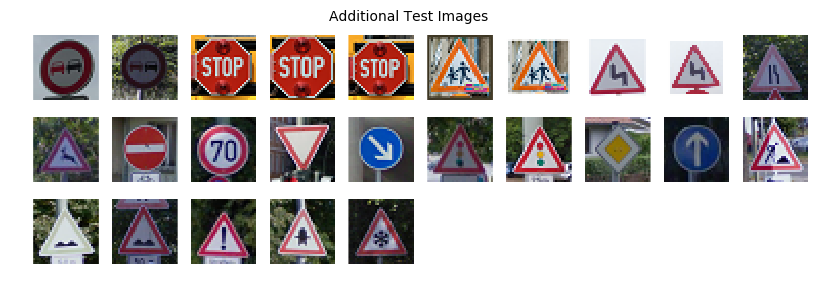

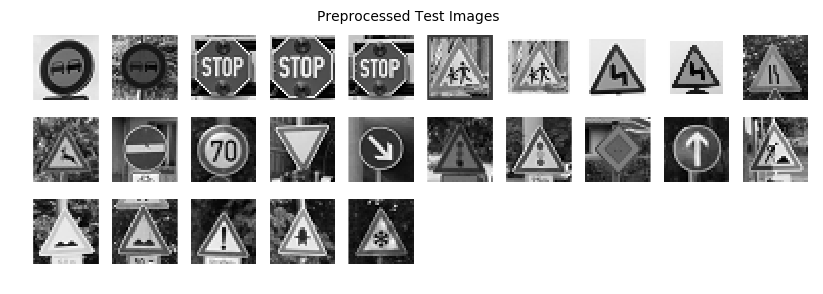

In [51]:
### Plot the downloaded test images in the notebook
displayImageSet(clr_images, 'Additional Test Images')
displayImageSet(new_images, 'Preprocessed Test Images')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**<br>
It is incongruous to present images outside of the classification system on which a model is trained. (For example, if a child is taught to recognize numerals 0 though 9, then it would be illogical to test using Roman numerals.) That said, one could argue signage in other countries might be similar to that used in Germany. True for some categories such as the stop, yield, and do not enter. 

I captured most of the candidate images shown above using Google Street View in random locations around Berlin. (For example, the animal crossing is located at GPS coordinates: 52.403919, 13.592668). I sized them according to the dataset specifications and perturbed the scale of three images slightly for further test cases; the remainder is unmodified. 

The stop sign is from an American school bus and has a pair of additional lights in its structure. The condition of the children crossing sign is degraded: rusty with applied promotional stickers in the lower right. Also, the bumpy road sign is sun-bleached on the edges. These images in particular may be difficult to classify, but in theory the grayscale preprocessing should suffice.

### Test a Model on New Images (Part 2)
#### Performance on New Images

In [52]:
### Run the predictions
r_images= np.reshape(new_images, (-1, 32, 32, 1))
r_acc, r_set= session.run([evaluate, correct_prediction], feed_dict={x: r_images, y_true: r_labels, keep_prob:1.0})
print('Predictions:', r_set)
print('New image accuracy:', r_acc)
print('STEP COMPLETE')

Predictions: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
New image accuracy: 1.0
STEP COMPLETE


In [53]:
# Check the certainty
new_image = []
new_image.append(r_images[9])
newPredict = session.run(y_pred, feed_dict={x: new_image, keep_prob:1.0})
print(np.max(newPredict)*100,"percent certain on image", 9)
print('STEP COMPLETE')

69.501632452 percent certain on image 9
STEP COMPLETE


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**<br>
The selected model performs well on captured images (within the classification system) when scaled to the specifications of the training data. The results are 100% accuracy in classifying the 25 new images (none wrong). This is expected since the model achieves better than 94% on the original test dataset. Additional test images would eventually corroborate this. In several past test runs, the image from class 24 (Road narrows on right) was often misclassified.

### Test a Model on New Images (Part 3)

#### Model Certainty Visualization

STEP COMPLETE


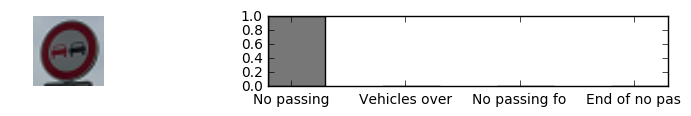

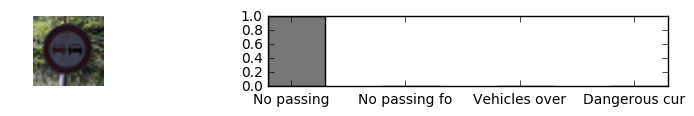

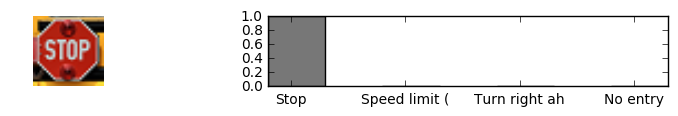

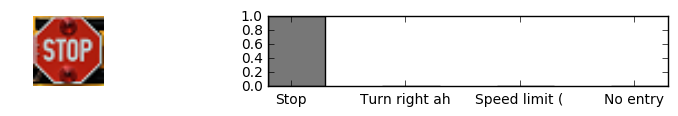

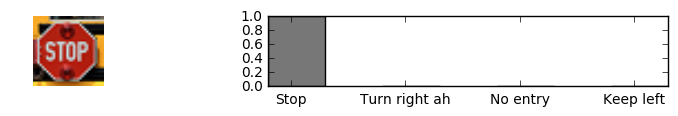

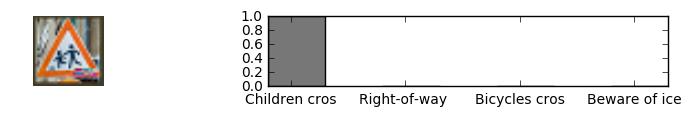

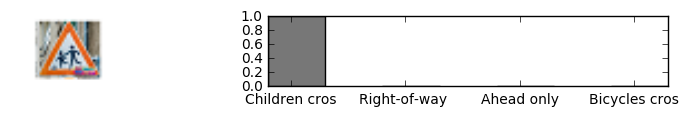

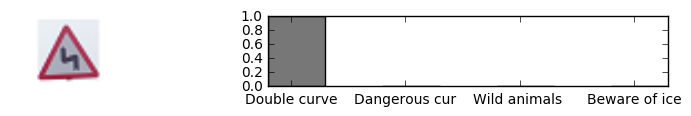

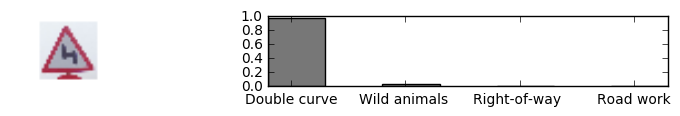

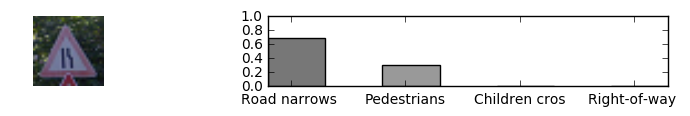

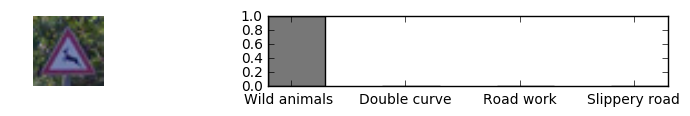

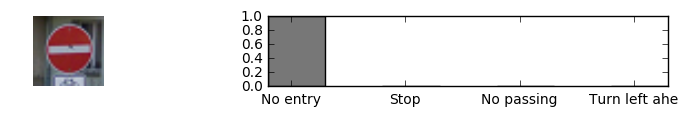

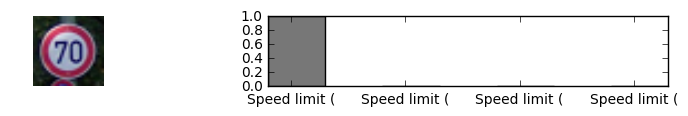

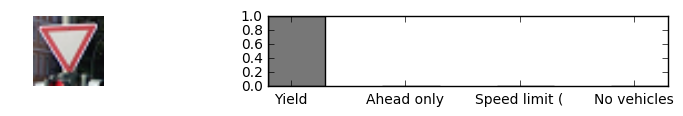

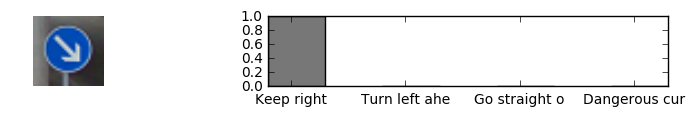

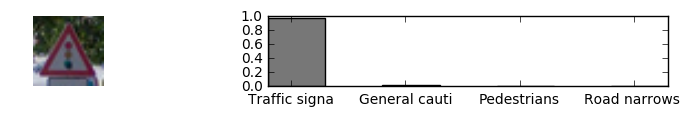

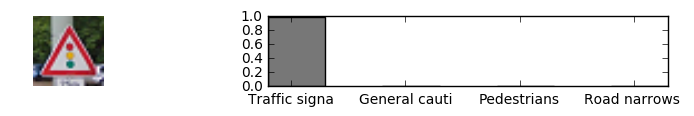

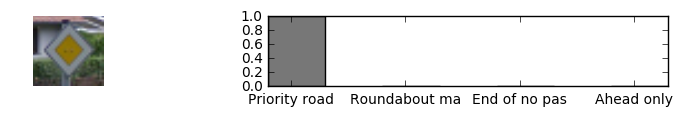

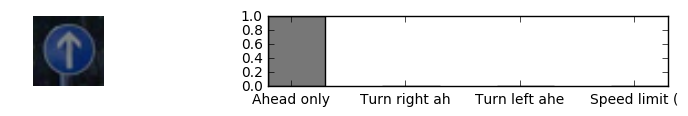

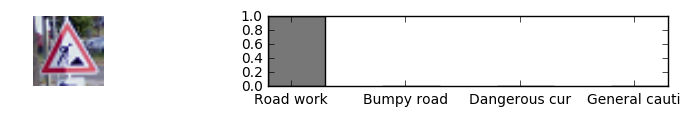

In [54]:
### Visualize the softmax probabilities here.
viz = session.run(tf.nn.top_k(y_pred,k=4), feed_dict={x: r_images, keep_prob:1.0})
for i in range(20):  #len(clr_images)-5
    fig, axes = plt.subplots(1, 2, figsize= (8,.7))
    plt.subplots_adjust(0, 0, 1, 1, 0, .1)
    for j, ax in enumerate(axes.flat):
        if j == 0:
            ax.axis('off')
            ax.imshow(clr_images[i],cmap='gray')
        if j == 1:
            ax.bar([0,1,2,3], viz[0][i], .5, color=['#777777','#999999','#bbbbbb','#dddddd'])
            ax.set_xticks(np.arange(4)+.2)
            ax.set_xticklabels([labelList[k][0:13] for k in viz[1][i]])
            ax.set_ylim(0,1)

print('STEP COMPLETE')

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model is incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

**Answer:**<br>
The above plot visualizes the certainty of the top 4 predictions for the first 20 candidate images. After 20 training epochs, the final model performs at 100% accuracy on the 25 test images with high certainty on most. The "Road narrows on right" sign achieves 69.5% certainty. 

During the investigative phase with other models, the top 4 probabilities varied widely. In early cycles of training, when test accuracy is under 0.9, sometimes an incorrect softmax prediction is 100% certain. Indeed, the top four usually contains the correct class, only not in the first position.

<b>Concluding remarks:</b> 

As drivers, we are not subjected to a single flash of one poor, low-resolution photograph. Likewise, a static image is not what an autonomous vehicle would actually "see". Rather, it would be working with video streams from multiple cameras. An image series in this stream would contribute to a confidence region where outliers can be removed. Further, research into a method of adversarial training may assist in traffic sign classification. https://arxiv.org/pdf/1612.07828v1.pdf and https://arxiv.org/pdf/1605.07725.pdf